# Introductory applied machine learning (INFR10069)

# Assignment 2: Linear regression

<font color='red'>TOTAL: 81/100</font>
<br>
<font color='green'>COMMENT: -</font>

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

Fill out this notebook, save it, and **submit it electronically as described below.**

On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

`submit iaml cw1 05_Assignment_2.ipynb`

What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
filename=05_Assignment_2.ipynb
local_scp_filepath=~/git/iaml2017/${filename}
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} ${UUN}@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} ${UUN}@${server_address}:${filename}
ssh ${UUN}@${server_address}
ssh student.login
submit iaml cw1 05_Assignment_2.ipynb
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline

## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: 

1. The specification of an automobile in terms of various characteristics 

1. Assigned insurance risk rating 
   * this rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

1. Normalized losses in use as compared to other cars
  * the third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year (avg_loss/car/year). 


To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.


## 1. Simple Linear Regression [50%]
We will begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable. When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. In this Section we will consider one independent variable (i.e. feature) `engine-power` against the dependent variable (i.e. target) `price`.

### ========== Question 1.1 --- [1 mark] ==========
Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Display the number of data points and attributes in the dataset.

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT:  - </font>

In [2]:
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(data_path, delimiter = ',')
print(auto_numeric.shape[0])
print(auto_numeric.shape[1])

159
16


### ========== Question 1.2 --- [1 mark] ==========
Display the first 8 instances of the dataset.

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT:  - </font>

In [3]:
auto_numeric.head(8)

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.40,10.0,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
1,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.40,8.0,115000.0,5500.0,18.0,22.0,47.39,59.59,17450.0
2,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.80,8.5,70000.0,4400.0,28.0,30.0,0.85,3344.79,17710.0
3,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.50,7.8,140000.0,5600.0,32.0,20.0,44.74,68.97,23875.0
4,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.80,8.8,101000.0,5800.0,23.0,29.0,44.78,53.48,16430.0
5,194.0,110.0,190.9,71.4,58.7,8.67,3.78,3.90,22.5,101000.0,6000.0,47.0,53.0,1.80,1330.28,16925.0
6,188.0,101.2,176.8,64.8,54.3,26.58,3.31,3.19,9.0,121000.0,4250.0,21.0,28.0,7.19,377.06,20970.0
7,150.0,101.2,176.8,64.8,56.1,26.58,3.03,3.19,8.0,134000.0,4400.0,28.0,37.0,57.37,48.20,21105.0


### ========== Question 1.3 --- [1 mark] ==========
Display the summary statistics for the dataset.

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT:  - </font>

In [4]:
auto_numeric.describe()

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


### ========== Question 1.4 --- [2 marks] ==========
Produce a scatter plot of `price` against `engine-power`. Label axes appropriately and include a title in your plot.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  - </font>

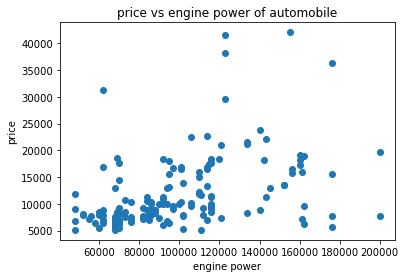

In [5]:
plt.scatter(auto_numeric["engine-power"], auto_numeric["price"])
plt.ylabel("price")
plt.xlabel("engine power")
plt.title("price vs engine power of automobile")
plt.show()

### ========== Question 1.5 --- [2 marks] ==========
Do you think that engine-power alone is sufficient for predicting the price? Can you make any other observations on the data from the above plot? Please explain your answer in 2-3 sentences. 

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: Yes.</font>

The engine power is not enough to predict the price. The plot shows a weak linear correlation between the engine power and the price. Most of the prices are within the the 5000-25000 bracket and are concentrated around 10000 (irrespective of the engine power) with quite a few outliers.  

### ========== Question 1.6 --- [2 marks] ==========
Visualise the distribution of the car prices. Choose a sensible value for the number of bins in the histogram. Again, label axes appropriately and include a title in your plot.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  - </font>

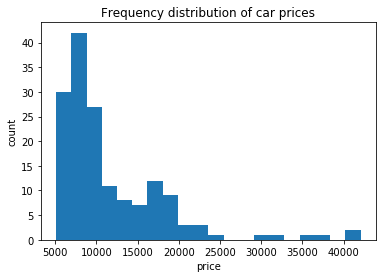

In [6]:
plt.hist(auto_numeric["price"], 20)
plt.xlabel("price")
plt.ylabel("count")
plt.title("Frequency distribution of car prices")
plt.show()

### ========== Question 1.7 --- [2 marks] ==========
How could you preprocess the data to improve the performance of linear regression? Don’t do it at this stage, but instead in one sentence explain why you would do what you suggested.

<font color='red'>TASK MARK: 0</font>
<br>
<font color='green'>COMMENT:  Here, the outliers are not invalid datapoints- they're just expensive cars, and as such, removing them would be inappropriate. A log transform would be better. </font>

We could visualise the data, making sure the relationship between the residuals and predicted values is not obviously nonlinear, and then remove the outliers before fiting the data to the model. We do this to make sure linear regression line is appropriate to the the data

### ========== Question 1.8 --- [1 mark] ==========
Now we want to build a simple linear regression model. First we need to define our input and target variables. Store the values of the attribute `engine-power` in a vector `X` and the values of our target variable `price` in a vector `y`.

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT:  - </font>

In [7]:
X = auto_numeric["engine-power"]
y = auto_numeric["price"]

### ========== Question 1.9 --- [1 mark] ==========
For technical reasons, we need to convert `X` into a 2D array, otherwise we will receive an error when trying to use it for building models. Perform this transformation and confirm that the shape of the resulting array is (`n`,1) where `n` is the number of instances in the dataset. 

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT:  - </font>

In [8]:
X = X.reshape(X.shape[0], 1)
X.shape

/afs/inf.ed.ac.uk/user/s15/s1558717/miniconda2/envs/iaml/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


(159, 1)

### ========== Question 1.10 --- [1 mark] ==========
Now we want to use Hold-out validation to split the dataset into training and testing subsets. Use 80% of the data for training and the remaining 20% for testing. Store your data into matrices `X_train`, `X_test`, `y_train`, `y_test`.

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT:  - </font>

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

### ========== Question 1.11 --- [2 marks] ==========
By using Scikit-learn's [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) fit a model to the training data. When initialising the model, set the `normalize` parameter to `True` and use default settings for the other parameters.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  - </font>

In [10]:
lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

### ========== Question 1.12 --- [2 marks] ==========
By looking into the attributes of your model, write down an equation for predicting the price of a car given the engine-power.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  Avoid spurious precision. </font>

In [11]:
m = lm.coef_
c = lm.intercept_
print ("y = {} * X + {}" .format(m, c))
#x is the engine power and y is the price

y = [ 0.08988389] * X + 2823.1218911


### ========== Question 1.13 --- [3 marks] ==========
What happens to the price as one more unit of engine-power is added? By examining the magnitude of the regression coefficient is it possible to tell whether or not engine-power is an important influential variable on price? Explain your answer in 1-2 sentences.

<font color='red'>TASK MARK: 0</font>
<br>
<font color='green'>COMMENT:  You should be clear here about the units involved; your regression coefficient is 9p. To understand whether this is a meaningful increment per unit of engine power, you must understand how variable engine power can be - i.e., a 20,000 unit increase in engine power by itself adds £1,800 to the price, which is not a small effect at all. </font>

When one more unit of engine power is added, the price goes up by 0.089 as the coefficient is positive and indicates increase in price. However because the coefficient is so small(less than 0.1), the engine power is not an important influential on price. 

### ========== Question 1.14 --- [2 marks] ==========
Produce a scatter plot similar to the one in Question 1.4 but use training data only this time. Add the regression line to the plot and show the predictions on the training set by using a different marker. Label axes appropriately and add a title to the graph. 

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  - </font>

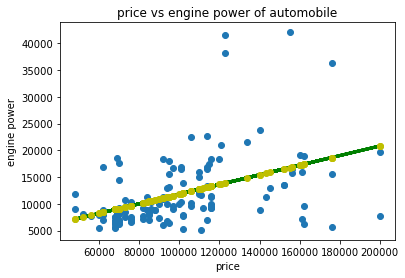

In [12]:
plt.scatter(X_train, y_train)
plt.plot(X_train, ((m*X_train) + c), "g-", linewidth = 3)
plt.plot(X_train, ((m*X_train) + c), "yo")
plt.xlabel("price")
plt.ylabel("engine power")
plt.title("price vs engine power of automobile")
plt.show()

### ========== Question 1.15 --- [2 marks] ==========
So far we have used Hold-out validation. Can you think of a disadvantage of using this method, especially when dealing with small datasets?

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  Precisely. </font>

In hold out validation, data points are randomly assigned to the training set and the testing set. With small datasets, the noise can significantly affect regression accuracy and the error might be much different every time we fit the model as it depends on how the division of the datapoints has been made (which is random). There might be a severe imbalance of classes in the training and testing sets when we are using hold out validation on small datasets.

### ========== Question 1.16 --- [1 mark] ==========
Now we want to use k-fold cross-validation to evaluate the performance of the regression model. Famliriase yourself with the sklearn method [`KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) and make sure you understand the differences between Hold-out and K-fold cross-validation. By using Scikit-learn's [`KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) class construct a 5-fold cross-validation object. Set the `shuffle` parameter to `True` and `random_state` to `0`. Use the object to print the training and validation indices for the `auto_numeric` dataset (hint: see the `split` method).

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT:  - </font>

In [13]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "\n\n", "TEST:", test_index, "\n\n")

TRAIN: [  0   1   2   3   4   5   6   9  10  11  12  13  14  15  16  17  18  20
  21  22  23  25  27  28  29  30  31  32  34  35  36  38  39  41  42  43
  46  47  48  49  50  51  52  53  55  57  58  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  84  87  88  89  91  92
  93  94  96  97  98  99 100 101 102 103 104 105 106 107 108 109 111 112
 113 114 115 116 117 118 121 122 123 124 125 127 129 130 132 133 135 136
 137 138 139 140 141 143 145 146 147 149 150 151 152 153 154 155 156 157
 158] 

 TEST: [  7   8  19  24  26  33  37  40  44  45  54  56  59  60  61  62  63  83
  85  86  90  95 110 119 120 126 128 131 134 142 144 148] 


TRAIN: [  0   1   3   4   5   6   7   8   9  11  12  13  14  15  17  19  20  21
  23  24  25  26  28  29  31  32  33  34  35  36  37  38  39  40  41  42
  44  45  46  47  48  49  50  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  67  68  69  70  72  75  76  77  78  79  81  82  83  84  85
  86  87  88  90  91  92  94  95  

### ========== Question 1.17 --- [3 marks] ==========
By making use of the iterator you constructed in the previous question, loop through the 5 folds and display the mean value of the `price` variable for the training instances in each fold.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  Avoid spurious precision. </font>

In [14]:
for train_index, test_index in kf.split(X):
    sum_price = 0
    for index in train_index:
        sum_price = sum_price + y[index] #y is the price vector
    sum_price = sum_price/train_index.shape[0]
    print (sum_price)

11853.2677165
11635.976378
11689.8740157
11709.8267717
11535.84375


### ========== Question 1.18 --- [3 marks] ==========
Now initialise a new `LinearRegression` model and fit it by making use of the cross-validation iterator, the `X` and `y` arrays defined above and the [`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) function. Display the shape of your prediction and confirm it has the same dimensionality as your `y` vector.

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT:  - </font>

In [15]:
lm_new = LinearRegression(normalize=True)
y_pred = cross_val_predict(lm_new, X, y, cv = kf.split(X))
print (y_pred.shape)
print (y.shape)

(159,)
(159,)


### ========== Question 1.19 --- [2 marks] ==========
Report the Coefficient of Determination (R^2), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC) from the simple linear regression model you build in Question 1.18. *Hint: RMSE is the square root of the Mean Squared Error (MSE). For CC you might find numpy's [`corrcoef`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html) function useful.* 

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  Avoid spurious precision. </font>

In [16]:
print ("The Coefficient of Determination is : {}" .format(r2_score(y, y_pred)))
rmse = np.sqrt(mean_squared_error(y, y_pred))
print ("The Root mean squared error is : {}" .format(rmse))
print ("The Mean absolute error is : {}" .format(mean_absolute_error(y, y_pred)))
print ("The Correlation Coefficient is : \n  {}" .format((np.corrcoef(y, y_pred))[0][1]))

The Coefficient of Determination is : 0.173005270976
The Root mean squared error is : 6114.45211862
The Mean absolute error is : 3987.95779619
The Correlation Coefficient is : 
  0.417122199043


### ========== Question 1.20 --- [4 marks] ==========
What do the above metrics intend to measure? Relate the values of CC, MAE and RMSE to the observations you made in Question 1.5. Explain your answer in 1-2 short paragraphs.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:   Explain how the metrics actually work, please.</font>

The above metrics are meant to basically measure the distance between the predicted and true values. Because we have high values of Root Mean squared error and Mean absolute error, most of the predicted values are very far off from the actual values of price. This accounts for most of the outliers seen in 1.5.

We have a moderate value of the correlation coefficient becuase some of the predicted values may be close to the actual values (because linear regression draws a line through the model and some points are bound to be very close to the line). This shows that there is a very weak positive linear relationship between the engine power and price.

### ========== Question 1.21 --- [3 marks] ==========
Show a histogram of the residuals of the linear regression model (i.e. true - predicted values). Label axes appropriately and add a title to your plot. Does the distribution of residuals look like what you expected?

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT:   What can you say about the distribution here?</font>

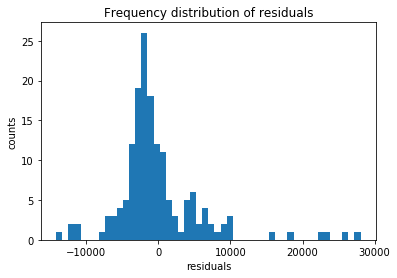

In [17]:
res = y - y_pred
plt.hist(res, 50)
plt.xlabel("residuals")
plt.ylabel("counts")
plt.title("Frequency distribution of residuals")
plt.show()

We see that the majority of residuals are negative. This is appropriate because the larger values and outliers shifted the regression line upwards to predict higher values, resulting in more negative residuals due to the concentation of prices in the lower bracket (around 10000). 

### ========== Question 1.22 --- [2 marks] ==========
Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the R^2, RMSE, MAE and CC metrics for this model by making use of the K-fold CV iterator constructed in Question 1.16.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  Avoid spurious precision. </font>

In [18]:
data_path_1 = os.path.join(os.getcwd(), 'datasets', 'train_auto_base.csv')
auto_base = pd.read_csv(data_path_1, delimiter = ',')
X_base = auto_base["engine-power"]
y_base = auto_base["price"]
X_base = X_base.values.reshape(X_base.shape[0], 1)
lr = LinearRegression(normalize=True)
y_base_pred = cross_val_predict(lr, X_base, y_base, cv = kf)
print ("The Coefficient of Determination is : {}" .format(r2_score(y_base, y_base_pred)))
rmse = np.sqrt(mean_squared_error(y_base, y_base_pred))
print ("The Root mean squared error is : {}" .format(rmse))
print ("The Mean absolute error is : {}" .format(mean_absolute_error(y_base, y_base_pred)))
print ("The Correlation Coefficient is : \n  {}" .format((np.corrcoef(y_base, y_base_pred))[0][1]))

The Coefficient of Determination is : -0.00213595381121
The Root mean squared error is : 6730.84360395
The Mean absolute error is : 4901.86096203
The Correlation Coefficient is : 
  -0.0619144160589


### ========== Question 1.23 --- [2 marks] ==========
Show a scatter plot of predicted vs. true prices and another one of predicted price vs. engine-power. Use a single plot with two subplots. Label axes appropriately.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  - </font>

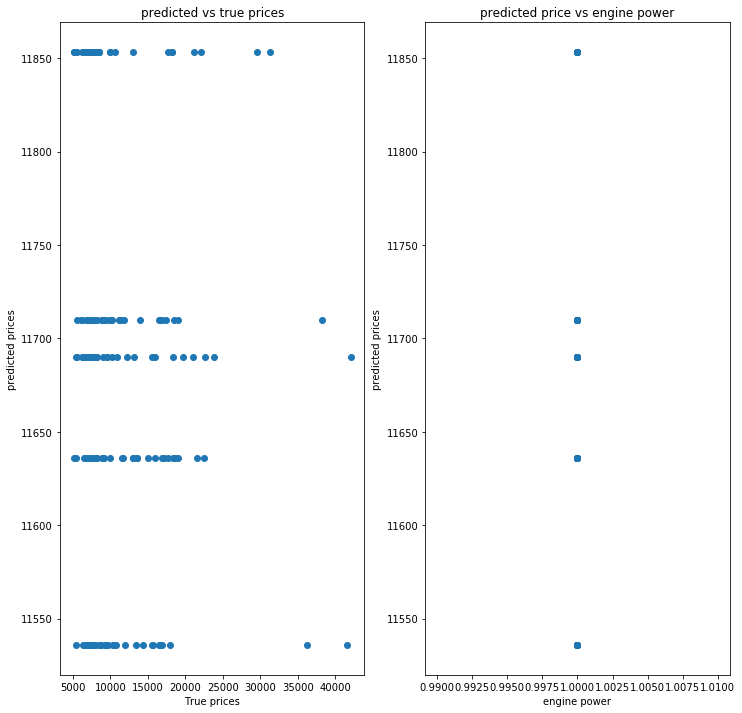

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12,12))
ax[0].scatter(y_base, y_base_pred)
ax[0].set_title("predicted vs true prices")
ax[0].set_xlabel("True prices")
ax[0].set_ylabel("predicted prices")
ax[1].scatter(X_base, y_base_pred)
ax[1].set_title("predicted price vs engine power")
ax[1].set_xlabel("engine power")
ax[1].set_ylabel("predicted prices")
plt.show()

### ========== Question 1.24 --- [3 marks] ==========
What is the simplest baseline model for the purposes of regression? Relate your answer to the regression model you have just built as part of this question. Can the predictions of this model be justified given the procedure you followed to train it?

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT:  Yes. </font>

The simplest baseline model is to assume the fixed mean of the variable we are predicting for all predicitions. This basically means that the predictions are based only on the average  values of the prices as the engine power values are the same for all datapoints. 

For our regression model, we can see 5 lines of data points in the True vs Predicted prices graph. This basically shows that the mean of prices has been taken 5 times for the 5 different folds of datapoints generated.

The predicitions of this model can't be justified because the predicted values set is basically a straight line which is gonna be correct or very close to the actual value a few times and have a huge error in difference with the original value most of the other times.

### ========== Question 1.25 --- [2 marks] ==========
Why do you think this model performs so poorly? (*Hint: Justify your answer by displaying some statistics about the `auto_base` dataset.*)

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT:  True, but you also ought to refer to the fact that the dataset has zero variance for engine-power, so it has zero predictive power. </font>

In [20]:
auto_base.describe()

,engine-power,price
count,159.0,159.000000
mean,1.0,11684.723270
std,0.0,6744.910579
min,1.0,5118.000000
25%,1.0,7372.000000
50%,1.0,9233.000000
75%,1.0,14719.500000
max,1.0,42056.000000


As we can see here, all the values of engine power are 1. There is no correlation between the engine power and price and therefore the model predicts price values only on the basis of average price values. Therefore it performs badly and is very close to the actual value only very few times.

## 2. Multivariate Linear Regression [50%]
In this Section we will fit a Multivariate Linear Regression model (LinearRegression) to the dataset. In contrast to Part 1, we will now train a model with multiple explanatory variables and ascertain how they affect our ability to predict the retail price of a car. One of our foremost concerns will be to determine exactly which attributes to include in the model and which may be left out.

### ========== Question 2.1 --- [10 marks] ==========
Use the original dataset (`auto_numeric`) and a visualisation tool of your choice to examine whether or not any of the other attributes are particularly good at predicting the price. Can you find any? Do any attributes appear useless at predicting the price? Do any attributes exhibit significant correlations? As you answer these questions, list two attributes for each question but do not modify the dataset at this stage. Of the attributes you listed, which ones could you safely remove? Explain in 4-5 sentences. *Hint: you might find seaborn's [`pairplot`](https://seaborn.github.io/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) function useful for this question.*

<font color='red'>TASK MARK: 7</font>
<br>
<font color='green'>COMMENT:  You need to mention a correlated pair, and observe that one of this pair can also safely be removed. </font>

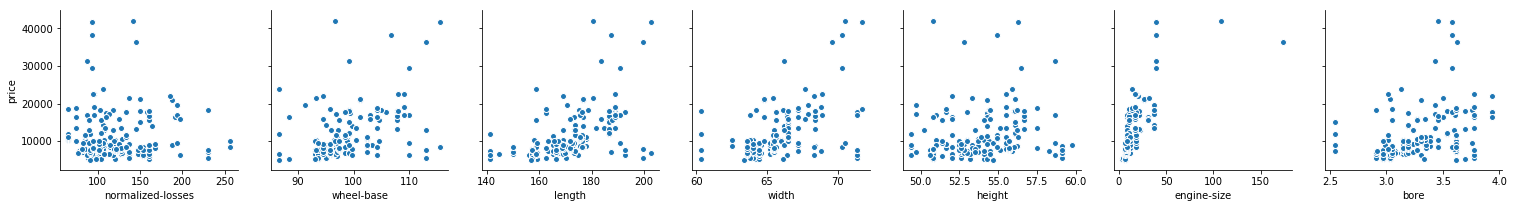

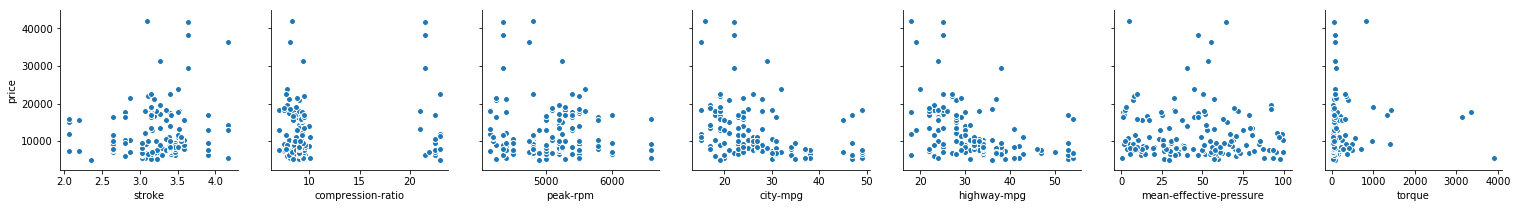

In [21]:
g = sns.pairplot(data=auto_numeric, x_vars = ["normalized-losses", "wheel-base", "length", "width", "height", "engine-size", "bore"], y_vars = ["price"], size = 3)
g = sns.pairplot(data=auto_numeric, x_vars = ["stroke", "compression-ratio", "peak-rpm", "city-mpg", "highway-mpg", "mean-effective-pressure", "torque"], y_vars = ["price"], size = 3)

In [22]:
from sklearn.metrics import accuracy_score

colms = ["normalized-losses", "width", "engine-size", "peak-rpm"]
for i in colms:
    print ("The correlation between {} and the price is {}".format(i, np.corrcoef(auto_numeric[i], auto_numeric["price"])[0][1])) 

The correlation between normalized-losses and the price is 0.0153676474237
The correlation between width and the price is 0.524325552127
The correlation between engine-size and the price is 0.715124590191
The correlation between peak-rpm and the price is -0.0993452910632


The length, width, wheel base and engine size and  seem to have some sort of linear relation with the price. The normalised-issues and peak-rpm appear to have no correlation with the price at all and hence appear useless at predicting the price. The width and engine-size seem to exhibit a strong posititve linear correlation with the price. We could safely remove normalised-issues and peak-rpm as they seem to have none or very less correlation with the price and hence will not affect the predicted values of the price in the regression model. 

The for loop above proves the correlations that we have estimated from the graph.

### ========== Question 2.2 --- [3 marks] ==========
We will now make a first attempt at building a Multivariate Linear Regression model using all numeric attributes. Initialise a `LinearRegression` model and predict the output by using 5-fold cross-validation and the `cross_val_predict` function.

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT:  - </font>

In [23]:
A = auto_numeric.as_matrix(columns = ["normalized-losses", "wheel-base", "length", "width", "height", "engine-size", "bore", "stroke", "compression-ratio", "engine-power", "peak-rpm", "city-mpg", "highway-mpg", "mean-effective-pressure", "torque"])
b = auto_numeric["price"]
lmulti = LinearRegression(normalize=True)
multib_pred = cross_val_predict(lmulti, A, b, cv = kf)
print (multib_pred.shape)
print (b.shape)

(159,)
(159,)


### ========== Question 2.3 --- [2 marks] ==========
Display the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC).

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  Avoid spurious precision. </font>

In [24]:
rmse = np.sqrt(mean_squared_error(b, multib_pred))
print ("The Root mean squared error is : {}" .format(rmse))
print ("The Mean absolute error is : {}" .format(mean_absolute_error(b, multib_pred)))
print ("The Correlation Coefficient is : {}" .format((np.corrcoef(b, multib_pred))[0][1]))

The Root mean squared error is : 4819.80464283
The Mean absolute error is : 3050.34459963
The Correlation Coefficient is : 0.742560270537


### ========== Question 2.4 --- [2 marks] ==========
 Comment on each metric display above in comparison to what you have obtained for the Simple Linear Regression model in Question 1.19.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  - </font>

The correlation coefficient we get here is quite high, showing that there is a strong positive correlation between the independent attributes and the price attribute we need to predict. The linear function of all the attributes can predict the price better than just the linear function of the engine power.  The root mean squared error and mean asbolute error have decreased significantly indicating a lesser difference in predicted and actual values due to an improved model.  

### ========== Question 2.5 --- [2 marks] ==========
Examine the histogram for the `engine-size` attribute. Choose a sensible value for the number of bins in the histogram. Label axes appropriately and include a title in your plot.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  - </font>

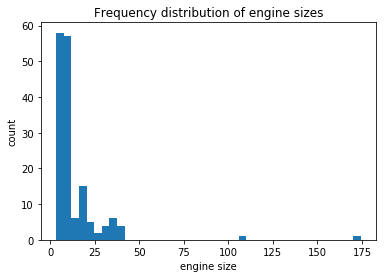

In [25]:
plt.hist(auto_numeric["engine-size"], 40)
plt.xlabel("engine size")
plt.ylabel("count")
plt.title("Frequency distribution of engine sizes")
plt.show()

### ========== Question 2.6 --- [2 marks] ==========
Is the distribution expected to cause a problem for regression? Explain your answer in 2-3 sentences.

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT:   In other words, skewness. But how do we fix it?</font>

Most of the values for engine size are concentrated between 0 and 25 so the larger values of the engine size and the outliers might shift the linear regression line. 

### ========== Question 2.7 --- [3 marks] ==========
Transform this attribute using an appropriate simple technique from the lectures. Plot the histogram of the transformed attribute.

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT:  Good. </font>

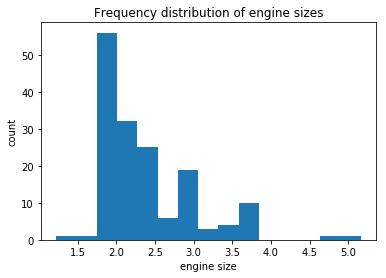

In [26]:
for i in range (auto_numeric["engine-size"].shape[0]):
    auto_numeric["engine-size"][i] = np.log(auto_numeric["engine-size"][i])
plt.hist(auto_numeric["engine-size"], 15)
plt.xlabel("engine size")
plt.ylabel("count")
plt.title("Frequency distribution of engine sizes")
plt.show()

### ========== Question 2.8 --- [3 marks] ==========
Now re-build a Linear Regression model on the transformed dataset and report the R^2, RMSE, MAE and CC metrics.

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT:  - </font>

In [27]:
mulA = auto_numeric.as_matrix(columns = ["normalized-losses", "wheel-base", "length", "width", "height", "engine-size", "bore", "stroke", "compression-ratio", "engine-power", "peak-rpm", "city-mpg", "highway-mpg", "mean-effective-pressure", "torque"])
mulb = auto_numeric["price"]
lmu = LinearRegression(normalize=True)
mulb_pred = cross_val_predict(lmu, mulA, mulb, cv = kf)
print (mulb_pred.shape)
print (mulb.shape)
print ("The Coefficient of Determination is : {}" .format(r2_score(mulb, mulb_pred)))
rmse = np.sqrt(mean_squared_error(mulb, mulb_pred))
print ("The Root mean squared error is : {}" .format(rmse))
print ("The Mean absolute error is : {}" .format(mean_absolute_error(mulb, mulb_pred)))
print ("The Correlation Coefficient is : {}" .format((np.corrcoef(mulb, mulb_pred))[0][1]))

(159,)
(159,)
The Coefficient of Determination is : 0.689612268029
The Root mean squared error is : 3745.91959756
The Mean absolute error is : 2668.36429567
The Correlation Coefficient is : 0.831675321658


### ========== Question 2.9 --- [3 marks] ==========
How has the performance of your model changed? Explain your answer in 1-2 sentences.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:   I would have liked to have seen a bit more analysis here. *How* did it help?</font>

The root mean squared errors and mean absolute errors have decreased further, and the Coefficient of Determination and Correlation Coefficient have increased further as compared to 2.3. 

This shows that preprocessing the engine size to deal with large valued datapoints and outliers improves the models prediction accuracy significantly and proves that engine size has a strong positive correlation with the price and is a good attribute for predicting the price.

### ========== Question 2.10 --- [2 marks] ==========
So far we have performed regression with numeric attributes. We will now attempt to integrate nominal (categorical) attributes into our regression model. 
Load the dataset `train_auto_full.csv` into a pandas DataFrame called `auto_full`. Display the number of samples and attributes in the dataset. Also, display the first 20 instances of the dataset. *Hint: Execute the cell below to change the default for `max_columns` display option in pandas.*

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  - </font>

In [28]:
pd.set_option('max_columns', 30)

In [29]:
data_path_2 = os.path.join(os.getcwd(), 'datasets', 'train_auto_full.csv')
auto_full = pd.read_csv(data_path_2, delimiter = ',')
print ("The number of samples are : {}" .format(auto_full.shape[0]))
print ("The number of attributes are : {}".format(auto_full.shape[1]))
auto_full.head(20)

The number of samples are : 159
The number of attributes are : 27


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,symboling,mean-effective-pressure,torque,price
0,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,ohc,4,8.85,mpfi,3.19,3.40,10.00,102000.0,5500.0,24.0,30.0,2,40.52,57.68,13950.0
1,110.0,audi,gas,std,4,sedan,4wd,front,99.4,162.4,66.4,54.3,ohc,5,15.18,mpfi,3.19,3.40,8.00,115000.0,5500.0,18.0,22.0,2,47.39,59.59,17450.0
2,158.0,audi,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,51.6,ohc,5,15.18,mpfi,3.94,2.80,8.50,70000.0,4400.0,28.0,30.0,1,0.85,3344.79,17710.0
3,106.0,audi,gas,turbo,4,sedan,fwd,front,86.6,158.7,67.7,55.9,ohc,5,13.74,mpfi,3.13,3.50,7.80,140000.0,5600.0,32.0,20.0,1,44.74,68.97,23875.0
4,192.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,4,8.67,mpfi,3.50,2.80,8.80,101000.0,5800.0,23.0,29.0,2,44.78,53.48,16430.0
5,194.0,bmw,gas,std,4,sedan,rwd,front,110.0,190.9,71.4,58.7,ohc,4,8.67,mpfi,3.78,3.90,22.50,101000.0,6000.0,47.0,53.0,0,1.80,1330.28,16925.0
6,188.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,6,26.58,mpfi,3.31,3.19,9.00,121000.0,4250.0,21.0,28.0,0,7.19,377.06,20970.0
7,150.0,bmw,gas,std,4,sedan,rwd,front,101.2,176.8,64.8,56.1,ohc,6,26.58,mpfi,3.03,3.19,8.00,134000.0,4400.0,28.0,37.0,0,57.37,48.20,21105.0
8,121.0,chevrolet,gas,std,2,hatchback,fwd,front,88.4,141.1,60.3,53.2,l,3,3.39,2bbl,3.03,3.03,9.50,48000.0,5300.0,47.0,53.0,2,59.33,25.08,5151.0
9,98.0,chevrolet,gas,std,2,hatchback,fwd,front,104.3,155.9,68.3,52.0,ohc,4,6.05,2bbl,3.31,3.47,7.80,70000.0,5000.0,34.0,34.0,1,51.55,36.35,6295.0


### ========== Question 2.11 --- [3 marks] ==========
This dataset contains a mixture of numeric and nominal attributes. Name the variables that you think are categorical. Why can we not use the nominal attributes in their current form for the purposes of regression? 

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  Also; number_of_cylinders, number_of_doors, and symboling; these may be expressed with numbers, but they are to be understood as categories; it should not be assumed that x.5 more cylinders should mean a x.5 greater weighting on the 'cylinders' variable. </font>

The 8 categorical attributes here are make, fuel-type, aspiration, body-style, drive-wheels, engine-location, engine-type and fuel-system. 

We can't use the nominal attributes in their cuurent form for regression because linear regression only works with numerical attributes. The categorical attributes we have do not have any sort of numeric value associated with them currently and hence they can't be used for regression before we convert them. 

### ========== Question 2.12 --- [5 marks] ==========
Now we want to convert the categorical variables by using [One-Hot-Encoding](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). Familiarise yourself with the class. One limitation with this module is that it can deal only with categorical attributes in integer format (remember that in our example we have attributes in string format). 

Copy the `auto_full` dataframe into a new dataframe `auto_full_edit` and transform the categorical variables by using [Label Encoding](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). Then transform again the categorical variables by using One-Hot-Encoding. Make sure you don't transform the continuous variables. *Hint: make appropriate use of the `categorical_features` parameter in [`OneHotEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).*

Store the transformed attributes into a numpy array `X_enc` and display its dimensionality.  


<font color='red'>TASK MARK: 5</font>
<br>
<font color='green'>COMMENT:   Interestingly, you do one-hot-encode *all* the categories.</font>

In [30]:
auto_full_edit = auto_full.copy(deep = True)
cols = ["make", "fuel-type", "aspiration" , "num-of-doors", "body-style" , "drive-wheels" , "engine-location" , "engine-type" , "num-of-cylinders", "fuel-system", "symboling"]
for i in cols:
    le = LabelEncoder()
    auto_full_edit[i] = le.fit_transform(auto_full_edit[i]) #Transforms each column

enc = OneHotEncoder(categorical_features = [1,2,3,4,5,6,7,12,13,15,23]) #indices for the categorical data
X_enc = enc.fit_transform(auto_full_edit.drop('price',axis=1))
X_enc.shape

(159, 70)

### ========== Question 2.13 --- [2 marks] ==========
By using the transformed data train a multivariate linear regression model and by using 5-fold cross-validation report the R^2, RMSE, MAE and CC metrics.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  - </font>

In [31]:
lin_r = LinearRegression(normalize=True)
mb = auto_numeric["price"]
mb_pred = cross_val_predict(lin_r, X_enc, mb, cv = kf)
print (mb_pred.shape)
print (mb.shape)
print ("The Coefficient of Determination is : {}" .format(r2_score(mb, mb_pred)))
rmse = np.sqrt(mean_squared_error(mb, mb_pred))
print ("The Root mean squared error is : {}" .format(rmse))
print ("The Mean absolute error is : {}" .format(mean_absolute_error(mb, mb_pred)))
print ("The Correlation Coefficient is : {}" .format((np.corrcoef(mb, mb_pred))[0][1]))

(159,)
(159,)
The Coefficient of Determination is : 0.86383451765
The Root mean squared error is : 2481.07385412
The Mean absolute error is : 1706.44341397
The Correlation Coefficient is : 0.931517349598


### ========== Question 2.14 --- [4 marks] ==========
How does this more complex model perform with respect to your best performing model from either question 2.3 or 2.8? List one advantage and one disadvantage of using the more complex model.

<font color='red'>TASK MARK: 4</font>
<br>
<font color='green'>COMMENT:  Very good. </font>

This more complex model does much much better as compared to the scaled dataset that only took numeric values into consideration. Both the coefficients are high indicating the extremely high predicition accuracy of the model after it has taken into consideration all the attributes and how they affect the final predicted value. Both the errors have come down as well indicating  smaller residual values. 

One advantage of using this complex model is obviously that we can easily identify outliers in the dataset and get a high classification accuracy. One disadvantage of this model is that it might overfit to the data provided here and do very poorly when tested with a new/random set of datapoints (even though cross validation does help reduce the over fitting, we could decrease the variance further by using a higher fold cross validation, but not too high as this may lead to a more severe imbalance of classes in the training and testing sets). 

### ========== Question 2.15 --- [4 marks] ==========
Finally, experiment with tree-based regressors (e.g. [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html), [`RandomForestRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)) and report 5-fold cross-validation scores for R^2, RMSE, MAE and CC. Has your performance improved? Explain your answer in 1-2 sentences.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT:  Rather brief, lacking in analysis. </font>

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 50, random_state = 0)
rf_pred = cross_val_predict(rf, X_enc, mb, cv = kf)

print ("For the random forest regressor")
print ("The Coefficient of Determination is : {}" .format(r2_score(mb, rf_pred)))
rmse = np.sqrt(mean_squared_error(mb, rf_pred))
print ("The Root mean squared error for : {}" .format(rmse))
print ("The Mean absolute error is : {}" .format(mean_absolute_error(mb, rf_pred)))
print ("The Correlation Coefficient is : {}" .format((np.corrcoef(mb, rf_pred))[0][1]))
print ("\n")

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 0)
dt_pred = cross_val_predict(dt, X_enc, mb, cv = kf)

print( "For the decision tree regressor")
print ("The Coefficient of Determination is : {}" .format(r2_score(mb, dt_pred)))
rmse = np.sqrt(mean_squared_error(mb, dt_pred))
print ("The Root mean squared error for : {}" .format(rmse))
print ("The Mean absolute error is : {}" .format(mean_absolute_error(mb, dt_pred)))
print ("The Correlation Coefficient is : {}" .format((np.corrcoef(mb, dt_pred))[0][1]))


For the random forest regressor
The Coefficient of Determination is : 0.841226308253
The Root mean squared error for : 2679.14025082
The Mean absolute error is : 1782.04955975
The Correlation Coefficient is : 0.918473230892


For the decision tree regressor
The Coefficient of Determination is : 0.669283616279
The Root mean squared error for : 3866.64261351
The Mean absolute error is : 2388.76100629
The Correlation Coefficient is : 0.833490056431


The performance hasn't improved and the complex linear regressor is doing very slightly better than the decision trees and random forest regressor. All of these models are prone to overfitting on the processed training data. 